<a href="https://colab.research.google.com/github/Han-Archives/Colab/blob/main/%5BPyspark%5D_%EC%88%99%EB%B0%95%EC%97%85_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **주제 선정**

Local Data 사이트에서 제공하는 숙박업 데이터를 다운 받아 데이터 분석 프레임 워크인 PySpark를 활용하여 데이터 분석을 진행하자

& Local Data와 Pyspark 그림 활용

### **데이터 수집**

LocalDATA는 지자체에서 관리하고 있는 데이터 ex.식품, 건강, 문화, 생활 등 다양한 방면의 데이터를 보유 및 개방하는 사이트

https://www.localdata.go.kr/devcenter/dataDown.do?menuNo=20001

위의 사이트에서 숙박업과 관련된 데이터를 다운받아 진행.

### **데이터 전처리**

분석에 진행하기 전 PySpark 프레임워크를 활용하여 몇가지 전처리 과정을 진행하자

### PySpark 사용하기

#### 0. Colab에 Pyspark 설치
#### 1. SparkSession 생성하기
PySpark 프레임워크를 사용하려면 우선 SparkSession 객체 생성
#### 2. 파일 읽기
spark.read_csv(json,parquet)을 사용하여 데이터 읽기
#### 3. 데이터 전처리
불필요한 항목 제외 및 Null 값 대체하기
#### 4. 데이터 parquet으로 저장하기

In [1]:
# matplotlib 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## 0. Pyspark on colab
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u312-b07-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [5]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

In [6]:
!tar -xvf spark-3.2.1-bin-hadoop3.2.tgz


spark-3.2.1-bin-hadoop3.2/
spark-3.2.1-bin-hadoop3.2/LICENSE
spark-3.2.1-bin-hadoop3.2/NOTICE
spark-3.2.1-bin-hadoop3.2/R/
spark-3.2.1-bin-hadoop3.2/R/lib/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/vignette.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop3.2/R/lib/Sp

In [7]:
!pip install -q findspark

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [9]:
import findspark
findspark.init()

In [10]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
cd /content/drive/MyDrive/Data/lodge_industry

/content/drive/MyDrive/Data/lodge_industry


In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import os
import pandas as pd

## 1. SparkSession 객체 생성
spark = SparkSession\
        .builder\
        .appName('Python Spark SQL lodging')\
        .config('spark.some.config.option', 'some-value')\
        .getOrCreate()


In [13]:
## 2. 파일 읽기

lodge_df1 = spark.read.csv("fulldata_03_11_01_P_관광숙박업.csv", encoding='cp949',inferSchema = True, header = True)
lodge_df2 = spark.read.csv("fulldata_03_11_02_P_관광펜션업.csv", encoding='cp949',inferSchema = True, header = True)
lodge_df3 = spark.read.csv("fulldata_03_11_03_P_숙박업.csv", encoding='cp949',inferSchema = True, header = True)
lodge_df4 = spark.read.csv("fulldata_03_11_04_P_외국인관광도시민박업.csv", encoding='cp949',inferSchema = True, header = True)
lodge_df5 = spark.read.csv("fulldata_03_11_05_P_자동차야영장업.csv", encoding='cp949',inferSchema = True, header = True)
lodge_df6 = spark.read.csv("fulldata_03_11_06_P_한옥체험업.csv", encoding='cp949',inferSchema = True, header = True)
lodge_df7 = spark.read.csv("fulldata_03_11_07_P_일반야영장업.csv", encoding='cp949',inferSchema = True, header = True)

In [14]:
# printSchema()로 스키마 구조 확인
lodge_df1.printSchema()

root
 |-- 번호: string (nullable = true)
 |-- 개방서비스명: string (nullable = true)
 |-- 개방서비스아이디: string (nullable = true)
 |-- 개방자치단체코드: integer (nullable = true)
 |-- 관리번호: string (nullable = true)
 |-- 인허가일자: integer (nullable = true)
 |-- 인허가취소일자: integer (nullable = true)
 |-- 영업상태구분코드: integer (nullable = true)
 |-- 영업상태명: string (nullable = true)
 |-- 상세영업상태코드: double (nullable = true)
 |-- 상세영업상태명: string (nullable = true)
 |-- 폐업일자: integer (nullable = true)
 |-- 휴업시작일자: integer (nullable = true)
 |-- 휴업종료일자: integer (nullable = true)
 |-- 재개업일자: string (nullable = true)
 |-- 소재지전화: string (nullable = true)
 |-- 소재지면적: string (nullable = true)
 |-- 소재지우편번호: integer (nullable = true)
 |-- 소재지전체주소: string (nullable = true)
 |-- 도로명전체주소: string (nullable = true)
 |-- 도로명우편번호: integer (nullable = true)
 |-- 사업장명: string (nullable = true)
 |-- 최종수정시점: string (nullable = true)
 |-- 데이터갱신구분: string (nullable = true)
 |-- 데이터갱신일자: string (nullable = true)
 |-- 업태구분명: string (nullable = true

In [15]:
# lodge_df 데이터 확인
lodge_df1.show(5)

+----+------------+----------------+----------------+--------------------+----------+--------------+----------------+----------+----------------+--------------+--------+------------+------------+----------+------------+----------+--------------+---------------------------------+----------------------------------+--------------+--------------------------+--------------+--------------+--------------------+----------+----------------+--------------+--------------+----------------+------------+------+----------+----------------+----------+----------+--------+--------+------+----------+--------------------+-------------+----------+--------+--------+--------+------+----------+--------------------+--------+--------------+----------+------------+------------+----------+----------+--------------------+--------------------+----------+------------+------------+------------+--------+----------------+----+
|번호|개방서비스명|개방서비스아이디|개방자치단체코드|            관리번호|인허가일자|인허가취소일자|영업상태구분코드|영업상태명|상세영업상태코드|상세영업상태명|폐

각 csv 파일 마다 컬럼 목록이 다르므로 csv 파일 마다 공통된 컬럼과 분석에 적합한 항목들을 선택한 뒤 진행

In [16]:
# 위의 칼럼만 담은 새로운 DataFrame 생성 -- Select
lodge_df1 = lodge_df1.select(
    col('번호'),col('개방서비스명'),col('사업장명'), col('개방자치단체코드'), col('상세영업상태명'),col('인허가일자'),
    col('폐업일자'),col('데이터갱신일자') ,col('시설면적')
)

lodge_df2 = lodge_df2.select(
    col('번호'),col('개방서비스명'),col('사업장명'), col('개방자치단체코드'), col('상세영업상태명'),col('인허가일자'),
    col('폐업일자'),col('데이터갱신일자') ,col('시설면적')
)

lodge_df3 = lodge_df3.select(
    col('번호'),col('개방서비스명'),col('사업장명'), col('개방자치단체코드'), col('상세영업상태명'),col('인허가일자'),
    col('폐업일자'),col('데이터갱신일자') ,col('소재지면적')
)

lodge_df4 = lodge_df4.select(
    col('번호'),col('개방서비스명'),col('사업장명'), col('개방자치단체코드'), col('상세영업상태명'),col('인허가일자'),
    col('폐업일자'),col('데이터갱신일자') ,col('시설면적')
)

lodge_df5 = lodge_df5.select(
    col('번호'),col('개방서비스명'),col('사업장명'), col('개방자치단체코드'), col('상세영업상태명'),col('인허가일자'),
    col('폐업일자'),col('데이터갱신일자') ,col('시설면적')
)

lodge_df6 = lodge_df6.select(
    col('번호'),col('개방서비스명'),col('사업장명'), col('개방자치단체코드'), col('상세영업상태명'),col('인허가일자'),
    col('폐업일자'),col('데이터갱신일자') ,col('시설면적')
)

lodge_df7 = lodge_df7.select(
    col('번호'),col('개방서비스명'),col('사업장명'), col('개방자치단체코드'), col('상세영업상태명'),col('인허가일자'),
    col('폐업일자'),col('데이터갱신일자') ,col('시설면적')
)

In [17]:
# df3 번만 시설면적이 아닌 소재지면적으로 표기되므로 변경
# 칼럼명 변경 및 기존 칼럼 삭제
lodge_df3 = lodge_df3.withColumn("시설면적", col('소재지면적'))
lodge_df3 = lodge_df3.drop("소재지면적")

In [18]:
# 하나의 df로 합치기. (unionAll)
lodge = lodge_df1.unionAll(lodge_df2)
lodge = lodge.unionAll(lodge_df3)
lodge = lodge.unionAll(lodge_df4)
lodge = lodge.unionAll(lodge_df5)
lodge = lodge.unionAll(lodge_df6)
lodge = lodge.unionAll(lodge_df7)

In [19]:
lodge.show()

+----+------------+--------------------------------+----------------+--------------+----------+--------+--------------------+--------+
|번호|개방서비스명|                        사업장명|개방자치단체코드|상세영업상태명|인허가일자|폐업일자|      데이터갱신일자|시설면적|
+----+------------+--------------------------------+----------------+--------------+----------+--------+--------------------+--------+
|   1|  관광숙박업|               베니키아호텔 서산|         4530000|          휴업|  20180511|    null|2022-01-28 02:40:...|    null|
|   2|  관광숙박업|                    신양파크호텔|         3590000|          휴업|  19811129|    null|2022-01-23 02:40:...|     0.0|
|   3|  관광숙박업|         (주)파라다이스 온천호텔|         3480000|          휴업|  20041015|    null|2021-03-07 02:40:...|    null|
|   4|  관광숙박업|                  유니온관광호텔|         3410000|          휴업|  19890131|    null|2021-07-22 02:40:...| 4231.63|
|   5|  관광숙박업|      에스이엔비(주)백암관광호텔|         5250000|          휴업|  19830930|    null|2021-04-07 02:40:...|12081.29|
|   6|  관광숙박업|            파크비지니스관광호텔|        

In [20]:
# 결측치 확인
lodge.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in lodge.columns]).show()

+----+------------+--------+----------------+--------------+----------+--------+--------------+--------+
|번호|개방서비스명|사업장명|개방자치단체코드|상세영업상태명|인허가일자|폐업일자|데이터갱신일자|시설면적|
+----+------------+--------+----------------+--------------+----------+--------+--------------+--------+
|   0|          28|      15|              38|            35|        33|   39666|            40|    3062|
+----+------------+--------+----------------+--------------+----------+--------+--------------+--------+



### **Null 처리하기**

#### Null 값이 있는 칼럼은 아래와 같이 처리

* 개방서비스명 - '숙박업'으로 대체 (제일 많은 비율을 차지)

* 사업자명 - '알수없음'으로 대체

* 개방자치단체코드 - '999'로 대체. 추후 알수없음으로 교체

* 상세영업상태명 - '영업중'으로 대체

* 인허가일자 - 데이터의 평균을 구한 뒤 근접한 날짜로 대체

* 폐업일자 - 데이터 기준 날짜로 변경 (2022.03.11)

* 시설면적 - '0'으로 대체. 추후 알수없음으로 교체

* 갱신일자 - 데이터 기준 날짜로 대체 (2022-03)




In [21]:
lodge.select(avg("인허가일자")).show()

+--------------------+
|     avg(인허가일자)|
+--------------------+
|1.9993372109428637E7|
+--------------------+



In [22]:
lodge = lodge.na.fill('숙박업', subset=["개방서비스명"])
lodge = lodge.na.fill('알수없음', subset=["사업장명"])
lodge = lodge.na.fill(999, subset=["개방자치단체코드"])
lodge = lodge.na.fill('영업중', subset=["상세영업상태명"])
lodge = lodge.na.fill(19991231, subset=["인허가일자"])
lodge = lodge.na.fill(20220311, subset=["폐업일자"])
lodge = lodge.na.fill('0', subset=["시설면적"])


In [23]:
# 갱신일자
lodge.withColumn("갱신일자", lpad(col("데이터갱신일자"),7,""))
lodge = lodge.withColumn("갱신일자", lpad(col("데이터갱신일자"),7,""))

# 칼럼 삭제하기
lodge = lodge.drop("데이터갱신일자")

# na 값 대체하기
lodge = lodge.na.fill('2022-03', subset=["갱신일자"])

In [24]:
lodge = lodge.withColumn('면적', (regexp_replace('시설면적','[\s,]','')))
lodge = lodge.drop('시설면적')

In [25]:
lodge.show(50)

+----+------------+----------------------------------+----------------+--------------+----------+--------+--------+--------+
|번호|개방서비스명|                          사업장명|개방자치단체코드|상세영업상태명|인허가일자|폐업일자|갱신일자|    면적|
+----+------------+----------------------------------+----------------+--------------+----------+--------+--------+--------+
|   1|  관광숙박업|                 베니키아호텔 서산|         4530000|          휴업|  20180511|20220311| 2022-01|       0|
|   2|  관광숙박업|                      신양파크호텔|         3590000|          휴업|  19811129|20220311| 2022-01|     0.0|
|   3|  관광숙박업|           (주)파라다이스 온천호텔|         3480000|          휴업|  20041015|20220311| 2021-03|       0|
|   4|  관광숙박업|                    유니온관광호텔|         3410000|          휴업|  19890131|20220311| 2021-07| 4231.63|
|   5|  관광숙박업|        에스이엔비(주)백암관광호텔|         5250000|          휴업|  19830930|20220311| 2021-04|12081.29|
|   6|  관광숙박업|              파크비지니스관광호텔|         5080000|          휴업|  20021230|20220311| 2021-11| 1029.11|
|   7|  관광숙박

In [26]:
lodge.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in lodge.columns]).show()

+----+------------+--------+----------------+--------------+----------+--------+--------+----+
|번호|개방서비스명|사업장명|개방자치단체코드|상세영업상태명|인허가일자|폐업일자|갱신일자|면적|
+----+------------+--------+----------------+--------------+----------+--------+--------+----+
|   0|           0|       0|               0|             0|         0|       0|       0|   0|
+----+------------+--------+----------------+--------------+----------+--------+--------+----+



In [27]:
# Parquet로 저장하기 
#lodge.write.parquet("lodge.parquet")

### 숙박업 데이터를 통해 특징 파악하기

toPandas를 사용하여 Pandas로 변환한 후 데이터가 가진 특징을 확인하자.


In [28]:
lodge_df = lodge.toPandas()

lodge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67328 entries, 0 to 67327
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   번호        67328 non-null  object
 1   개방서비스명    67328 non-null  object
 2   사업장명      67328 non-null  object
 3   개방자치단체코드  67328 non-null  int32 
 4   상세영업상태명   67328 non-null  object
 5   인허가일자     67328 non-null  int32 
 6   폐업일자      67328 non-null  int32 
 7   갱신일자      67328 non-null  object
 8   면적        67328 non-null  object
dtypes: int32(3), object(6)
memory usage: 3.9+ MB


In [29]:
spark.stop()

In [30]:
lodge_df

,번호,개방서비스명,사업장명,개방자치단체코드,상세영업상태명,인허가일자,폐업일자,갱신일자,면적
0,1,관광숙박업,베니키아호텔 서산,4530000,휴업,20180511,20220311,2022-01,0
1,2,관광숙박업,신양파크호텔,3590000,휴업,19811129,20220311,2022-01,0.0
2,3,관광숙박업,(주)파라다이스 온천호텔,3480000,휴업,20041015,20220311,2021-03,0
3,4,관광숙박업,유니온관광호텔,3410000,휴업,19890131,20220311,2021-07,4231.63
4,5,관광숙박업,에스이엔비(주)백암관광호텔,5250000,휴업,19830930,20220311,2021-04,12081.29
...,...,...,...,...,...,...,...,...,...
67323,3059,일반야영장업,학암포글램핑,4620000,직권말소,20160722,20161018,2018-11,0
67324,3060,일반야영장업,송림캠핑장,4620000,직권말소,20160725,20160919,2018-11,0
67325,3061,일반야영장업,연포해수번영회제1야영장,4620000,직권말소,20160727,20161018,2018-11,0
67326,3062,일반야영장업,밧개해수욕장야영장,4620000,직권말소,20160727,20160919,2018-11,0


개방자치단체코드를 실제 지역으로 변환 (강남구, 서초구 -> 서울특별시)

In [31]:
code = pd.read_csv("자치단체코드.csv", encoding='cp949')

code.head(10)

,지역구명,자치단체코드
0,서울특별시,3000000
1,서울특별시,3010000
2,서울특별시,3020000
3,서울특별시,3030000
4,서울특별시,3040000
5,서울특별시,3050000
6,서울특별시,3060000
7,서울특별시,3070000
8,서울특별시,3080000
9,서울특별시,3090000


In [32]:
for i in range(len(code)):
    lodge_df['개방자치단체코드'][lodge_df['개방자치단체코드'] == code['자치단체코드'][i]] = code['지역구명'][i]

In [33]:
# 개방자치단체코드 -> 지역
lodge_df.rename(columns = {'개방자치단체코드':'지역'},inplace=True)

In [34]:
lodge_df

,번호,개방서비스명,사업장명,지역,상세영업상태명,인허가일자,폐업일자,갱신일자,면적
0,1,관광숙박업,베니키아호텔 서산,서산시,휴업,20180511,20220311,2022-01,0
1,2,관광숙박업,신양파크호텔,광주광역시,휴업,19811129,20220311,2022-01,0.0
2,3,관광숙박업,(주)파라다이스 온천호텔,대구광역시,휴업,20041015,20220311,2021-03,0
3,4,관광숙박업,유니온관광호텔,대구광역시,휴업,19890131,20220311,2021-07,4231.63
4,5,관광숙박업,에스이엔비(주)백암관광호텔,울진군,휴업,19830930,20220311,2021-04,12081.29
...,...,...,...,...,...,...,...,...,...
67323,3059,일반야영장업,학암포글램핑,태안군,직권말소,20160722,20161018,2018-11,0
67324,3060,일반야영장업,송림캠핑장,태안군,직권말소,20160725,20160919,2018-11,0
67325,3061,일반야영장업,연포해수번영회제1야영장,태안군,직권말소,20160727,20161018,2018-11,0
67326,3062,일반야영장업,밧개해수욕장야영장,태안군,직권말소,20160727,20160919,2018-11,0


운영기간이라는 새로운 변수를 생성

In [35]:
temp1 = (lodge_df['폐업일자']/10000).round(0)
temp2 = (lodge_df['인허가일자']/10000).round(0)

# 운영기간 = 폐업일자 - 인허가일자 후 
lodge_df['운영기간'] = temp1 - temp2

lodge_df

,번호,개방서비스명,사업장명,지역,상세영업상태명,인허가일자,폐업일자,갱신일자,면적,운영기간
0,1,관광숙박업,베니키아호텔 서산,서산시,휴업,20180511,20220311,2022-01,0,4.0
1,2,관광숙박업,신양파크호텔,광주광역시,휴업,19811129,20220311,2022-01,0.0,41.0
2,3,관광숙박업,(주)파라다이스 온천호텔,대구광역시,휴업,20041015,20220311,2021-03,0,18.0
3,4,관광숙박업,유니온관광호텔,대구광역시,휴업,19890131,20220311,2021-07,4231.63,33.0
4,5,관광숙박업,에스이엔비(주)백암관광호텔,울진군,휴업,19830930,20220311,2021-04,12081.29,39.0
...,...,...,...,...,...,...,...,...,...,...
67323,3059,일반야영장업,학암포글램핑,태안군,직권말소,20160722,20161018,2018-11,0,0.0
67324,3060,일반야영장업,송림캠핑장,태안군,직권말소,20160725,20160919,2018-11,0,0.0
67325,3061,일반야영장업,연포해수번영회제1야영장,태안군,직권말소,20160727,20161018,2018-11,0,0.0
67326,3062,일반야영장업,밧개해수욕장야영장,태안군,직권말소,20160727,20160919,2018-11,0,0.0


데이터의 특징을 확인하기 전에 갱신일자 현황을 확인

In [36]:
renewal_date = lodge_df['갱신일자'].value_counts()
renewal_date

2018-08    28001
2021-07     2517
2021-12     2102
2022-01     2004
2021-08     1567
2018-11     1456
2020-08     1364
2021-10     1312
2021-09     1241
2021-04     1164
2021-11     1157
2021-06     1114
2020-12     1093
2021-05     1074
2022-02     1066
2019-07     1059
2021-02     1040
2018-10     1035
2021-01      981
2021-03      956
2020-02      855
2020-07      845
2020-11      804
2018-12      801
2020-06      753
2019-12      707
2020-05      702
2020-01      694
2020-10      640
2020-04      637
2019-01      628
2020-03      626
2020-09      586
2019-06      578
2019-08      551
2019-11      516
2019-03      492
2019-05      460
2019-10      452
2019-09      435
2019-04      413
2019-02      390
2018-09      332
2022-03      128
Name: 갱신일자, dtype: int64

위 데이터는 2018년 8월부터 2022년 3월까지의 정보를 포함하고 있으며 대다수의 데이터는 아직 2018년도에 머무르는 것을 확인하였다.

### **따라서 2018년 8월 이후의 분석 내용에는 갱신되지 못한 데이터로 인해 실제와 다른 정보가 포함되어 있음을 인지하고 아래의 분석 과정을 봐주시기를 바랍니다.**

### 1.영업 상태와 폐업상태 건수를 알아보자
상세영업상태명을 영업, 폐업, 휴업 3가지로 분류

※ 영업, 휴업을 제외한 자료는 모두 폐업으로 분류

In [37]:
lodge_df['상세영업상태명'][lodge_df['상세영업상태명'] == '영업중'] = '영업'
lodge_df['상세영업상태명'][(lodge_df['상세영업상태명'] != '영업') & (lodge_df['상세영업상태명'] != '휴업')] ='폐업'

In [38]:
current_status = lodge_df['상세영업상태명'].value_counts()

current_status

영업    39135
폐업    27830
휴업      363
Name: 상세영업상태명, dtype: int64

In [39]:
## 파이 차트로 나타내기
status_df = pd.DataFrame(current_status)
status_df = status_df.reset_index()
status_df.rename(columns = {'index' : '영업상태'}, inplace = True)

([<matplotlib.patches.Wedge at 0x7f8e762bf210>,
 [Text(-0.27777047090880896, 1.0643512415979504, '영업'),
  Text(0.25970348918010755, -1.068903221862334, '폐업'),
  Text(1.0998422094675733, -0.01863100301881176, '휴업')],
 [Text(-0.1515111659502594, 0.5805552226897911, '58.1%'),
  Text(0.141656448643695, -0.5830381210158184, '41.3%'),
  Text(0.5999139324368581, -0.010162365282988231, '0.5%')])

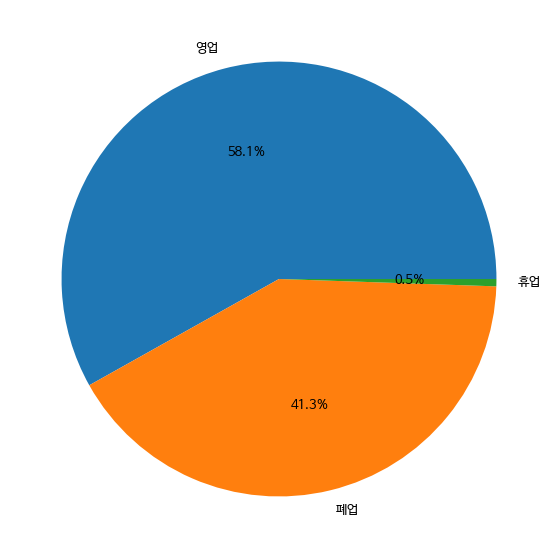

In [40]:
# pie 차트 형태로 나타내기
textprops = {"fontsize":13}
plt.figure(figsize=(10,10))
plt.pie(status_df['상세영업상태명'], labels=status_df['영업상태'],  autopct='%.1f%%', textprops= textprops)

### 2.운영기간의 분포를 파악하자

운영기간이라는 새로운 변수를 아래와 같은 식을 통해 생성

운영기간(년도) = 폐업기간 - 인허가일자를 통해 운영기간을 구함

우선 인허가일자와 폐업기간 속 오류를 정정하는 작업 시행

In [41]:
# 우선 인허가일자와 폐업기간 속 오류를 정정하는 작업 시행
lodge_df['인허가일자'].sort_values()

63825           0
65300           0
59388           0
58570           0
59385           0
           ...   
17632    20220228
58711    20220228
17631    20220228
63125    20220228
58712    20220228
Name: 인허가일자, Length: 67328, dtype: int32

In [42]:
lodge_df['폐업일자'].sort_values()

65300           0
2076            0
45313        2014
40777      199909
34122      200003
           ...   
22875    20220311
22876    20220311
22877    20220311
22847    20220311
33663    20220311
Name: 폐업일자, Length: 67328, dtype: int32

In [43]:
# 한국 정부 설립일 1948년 8월 15일 전에 허가가 된 자료들은 설립일로 변경
lodge_df['인허가일자'][lodge_df['인허가일자'] == 1931109] = 19931109
lodge_df['인허가일자'][lodge_df['인허가일자'] <= 19480815] = 19480815

In [44]:
# 폐업일자가 48년도 이전으로 나타난 경우 19480815로 변경
lodge_df['폐업일자'][lodge_df['폐업일자'] == 2014] = 20140000
lodge_df['폐업일자'][lodge_df['폐업일자'] == 199909] = 19990900
lodge_df['폐업일자'][lodge_df['폐업일자'] == 200003] = 20000300
lodge_df['폐업일자'][lodge_df['폐업일자'] == 200009] = 20000900
lodge_df['폐업일자'][lodge_df['폐업일자'] == 200204] = 20020400
lodge_df['폐업일자'][lodge_df['폐업일자'] == 2001123] = 20010123
lodge_df['폐업일자'][lodge_df['폐업일자'] <= 19480814] = 19480815

In [45]:
temp1 = (lodge_df['폐업일자']/10000).round(0)
temp2 = (lodge_df['인허가일자']/10000).round(0)

temp1.describe()

count    67328.000000
mean      2017.290147
std          7.395865
min       1948.000000
25%       2014.000000
50%       2022.000000
75%       2022.000000
max       2022.000000
Name: 폐업일자, dtype: float64

In [46]:
temp2.describe()

count    67328.000000
mean      1999.503891
std         15.368706
min       1948.000000
25%       1988.000000
50%       2002.000000
75%       2014.000000
max       2022.000000
Name: 인허가일자, dtype: float64

In [47]:
lodge_df['운영기간'] = temp1 - temp2

lodge_df['운영기간'].describe()

count    67328.000000
mean        17.786255
std         13.367892
min          0.000000
25%          6.000000
50%         17.000000
75%         27.000000
max         74.000000
Name: 운영기간, dtype: float64

운영기간을 아래와 같이 구분하여 비율을 파악해보자

5년이하, 6~10년도, 11년-20년, 21년-30년, 31년-40년, 41년이상

In [48]:
period_1 = lodge_df['번호'][lodge_df['운영기간'] <=5].count()
period_2 = lodge_df['번호'][(lodge_df['운영기간'] >= 6) & (lodge_df['운영기간'] <=10)].count()
period_3 = lodge_df['번호'][(lodge_df['운영기간'] >= 11) & (lodge_df['운영기간'] <=20)].count()
period_4 = lodge_df['번호'][(lodge_df['운영기간'] >= 21) & (lodge_df['운영기간'] <=30)].count()
period_5 = lodge_df['번호'][(lodge_df['운영기간'] >= 31) & (lodge_df['운영기간'] <=40)].count()
period_6 = lodge_df['번호'][lodge_df['운영기간'] >= 41].count()

In [49]:
# 데이터프레임으로 만들고 Pie 차트 생성
period = pd.DataFrame({'운영기간':['5년이하','6~10년','11년~20년','21~30년','31~40년','41년 이상'],
                      'count':[period_1,period_2,period_3,period_4,period_5,period_6]})

period

,운영기간,count
0,5년이하,15621
1,6~10년,10778
2,11년~20년,15364
3,21~30년,12558
4,31~40년,8690
5,41년 이상,4317


([<matplotlib.patches.Wedge at 0x7f8e76611350>,
 [Text(0.8205043395252875, 0.7326476839656099, '5년이하'),
  Text(-0.4181049594406049, 1.017442009596208, '6~10년'),
  Text(-1.099167184528615, -0.042796033174087755, '11년~20년'),
  Text(-0.2497172067103892, -1.0712802232248857, '21~30년'),
  Text(0.7597575682132678, -0.7954674333639699, '31~40년'),
  Text(1.0777583984691492, -0.2200836989175137, '41년 이상')],
 [Text(0.44754782155924766, 0.39962600943578713, '23.2%'),
  Text(-0.22805725060396628, 0.5549683688706589, '16.0%'),
  Text(-0.5995457370156081, -0.023343290822229683, '22.8%'),
  Text(-0.1362093854783941, -0.584334667213574, '18.7%'),
  Text(0.4144132190254187, -0.4338913272894381, '12.9%'),
  Text(0.5878682173468086, -0.12004565395500746, '6.4%')])

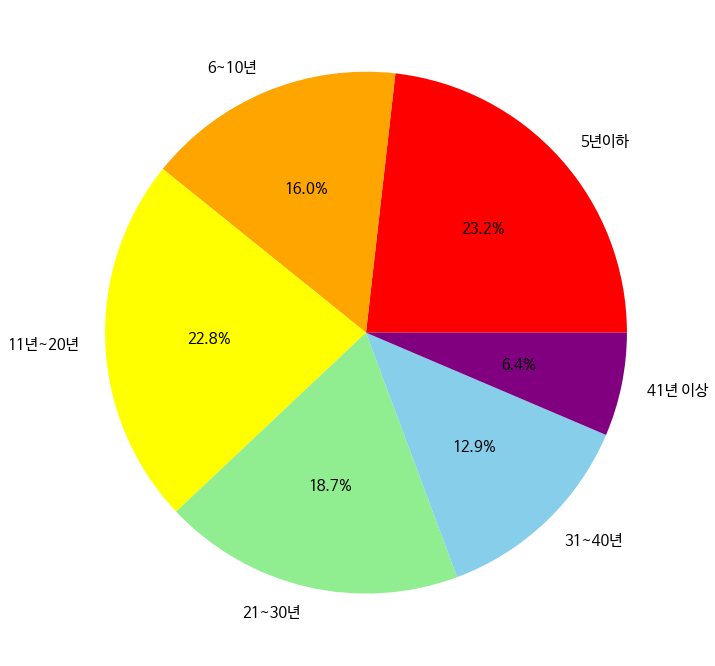

In [50]:
# pie 차트 형태로 나타내기
colors = ['red', 'orange', 'yellow', 'lightgreen', 'skyblue','purple']
textprops = {"fontsize":15}

plt.figure(figsize=(12,12))
plt.pie(period['count'], labels=period['운영기간'], colors=colors, autopct='%.1f%%', textprops= textprops)

### 3. 숙박업이 발달한 지역 알아보기

In [51]:
# 0이거나 999로 표기된 자료는 알수없음으로 변경
lodge_df['지역'][lodge_df['지역'] == 0] = '알수없음'
lodge_df['지역'][lodge_df['지역'] == 999] = '알수없음'   

In [52]:
lodge_count = lodge_df['지역'].value_counts()

lodge_count.head(30)

서울특별시    9765
부산광역시    4742
인천광역시    2985
대구광역시    1932
대전광역시    1561
광주광역시    1494
제주시      1468
창원시      1364
울산광역시    1233
전주시      1222
태안군      1059
여수시      1026
경주시      1012
수원시       981
서귀포시      968
강릉시       878
가평군       877
청주시       804
포항시       769
성남시       742
순천시       615
보령시       612
목포시       601
양양군       601
부천시       594
춘천시       519
고성군       511
구미시       493
거제시       491
진주시       487
Name: 지역, dtype: int64

In [53]:
# 숙박업이 발달하지 못한 지역
lodge_count.tail(30)

광주시     93
군포시     92
진천군     89
장성군     84
성주군     83
봉화군     83
장흥군     79
예천군     79
곡성군     79
옥천군     78
함안군     72
영동군     68
의성군     68
고령군     66
군위군     59
청양군     58
진도군     57
증평군     53
순창군     48
하남시     47
함평군     46
진안군     44
알수없음    40
의령군     38
임실군     35
영양군     35
계룡시     29
장수군     26
의왕시     21
과천시      9
Name: 지역, dtype: int64

### 4.면적 분포 확인하기

소재지면적에 대한 부분을 보면 자세한 조항이 없기 때문에 데이터 및 소재지라는 점을 봤을 때 대지면적으로 판단하는 것이 옳다고 판단하여 진행

In [54]:
size = lodge_df['면적']

size.sort_values(ascending=False)

30137    9999.66
702      9999.02
54797    9999.00
54793    9999.00
54782    9999.00
          ...   
55685        .00
45768        .00
45769        .00
45774        .00
42372        .00
Name: 면적, Length: 67328, dtype: object

### Trouble Shooting

1. 면적 데이터 타입이 object를 int 형으로 변환

2. 일반적인 면적 분포를 파악하기 알고 싶었으나 사업장의 면적과 같은 부분은 자치구에서 중요하게 관리하는 부분이 아니라 아래와 같이 신뢰하기 힘든 데이터가 다수 포함. box plot을 통해 이상값은 0(알수없음)으로 변경

In [55]:
# 1. 데이터형 변환
lodge_df['면적'] = lodge_df['면적'].astype('float')

In [56]:
# 2. 면적의 최대값 설정하기
# boxplot 에서 이상값 경계치를 최대값으로 설정
# 0으로 설정된 부분은 중앙값으로 대체

find_max = lodge_df['면적']

# 중앙 값 확인
find_max.describe() 

count    6.732800e+04
mean     4.301137e+03
std      4.170719e+05
min      0.000000e+00
25%      8.320000e+01
50%      3.355200e+02
75%      8.560000e+02
max      9.933791e+07
Name: 면적, dtype: float64

In [57]:
# 건물부지 최소크기는 60이므로 그 이하의 값은 중앙값으로 대체
# 98년도 이전 건물에는 해당 x -- 하지만 숙박업종 특성상 최소값을 지정하는 것이 옳다고 판단
find_max[find_max <= 60] = 335

In [58]:
# 5000이상의 값을 0으로 한뒤 boxplot으로 최대값 확인
find_max[find_max >= 5000] = 0

{'boxes': [<matplotlib.lines.Line2D at 0x7f8e74a4d4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8e74a7c4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e76b56510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e74a7cf90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8e74a4da10>,
  <matplotlib.lines.Line2D at 0x7f8e74a4df50>]}

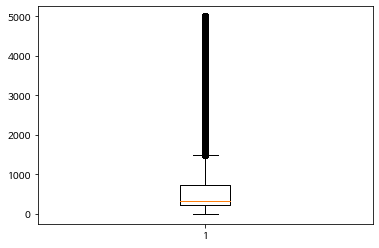

In [59]:
plt.boxplot(find_max)

위 BoxPlot을 통해 Max 값을 1500으로 설정

In [60]:
lodge_df['면적'][lodge_df['면적'] >= 1500.1] = 0

lodge_df['면적'].describe()

count    67328.000000
mean       391.468432
std        340.166903
min          0.000000
25%        134.657500
50%        335.000000
75%        515.840000
max       1500.000000
Name: 면적, dtype: float64

In [61]:
# 면적 별로 나눠 분포 확인하기
bins = [-1,0,100,300,500,700,900,1100,1300,1500]
labels = ['알수없음','100미만', '100이상~300미만', '300이상~500미만', '500이상~700미만',
          '700이상~900미만','900이상~1100미만','1100이상~1300미만','1300이상~1500']
size_bins = pd.cut(lodge_df['면적'], bins, right=True, labels=labels)

size_bins

0        300이상~500미만
1        300이상~500미만
2        300이상~500미만
3               알수없음
4               알수없음
            ...     
67323    300이상~500미만
67324    300이상~500미만
67325    300이상~500미만
67326    300이상~500미만
67327    300이상~500미만
Name: 면적, Length: 67328, dtype: category
Categories (9, object): ['알수없음' < '100미만' < '100이상~300미만' < '300이상~500미만' ... '700이상~900미만' <
                         '900이상~1100미만' < '1100이상~1300미만' < '1300이상~1500']

In [62]:
count_size = size_bins.value_counts(sort=False)

count_size

알수없음              8778
100미만             4845
100이상~300미만      13215
300이상~500미만      23203
500이상~700미만       5999
700이상~900미만       4103
900이상~1100미만      3419
1100이상~1300미만     2051
1300이상~1500       1715
Name: 면적, dtype: int64

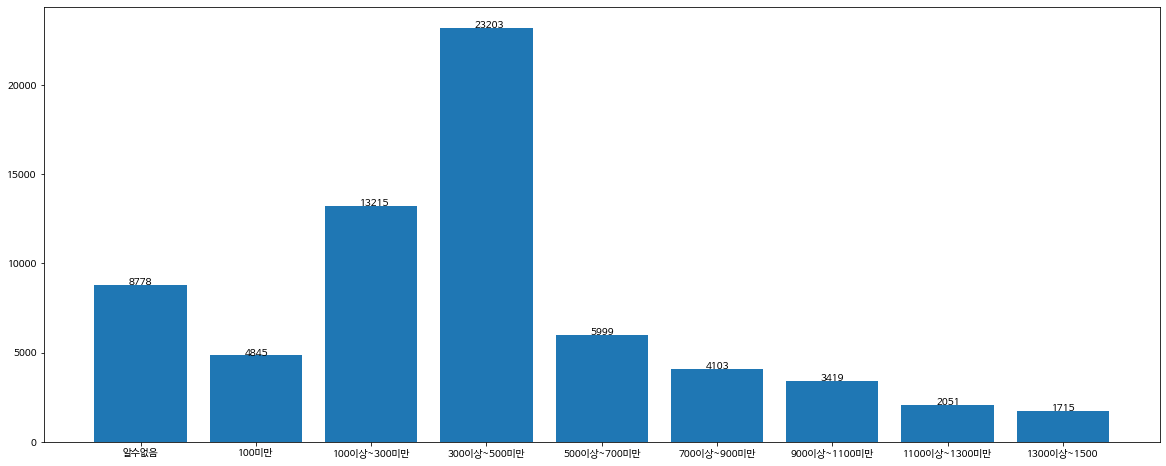

In [63]:
plt.figure(figsize=(20,8))            
bars = plt.bar(labels, count_size)

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.3, yval + 0.2, yval)

### 5.년도별 인허가 및 폐업상황 그래프로 확인
1948년부터 2022년도까지의 허가 및 폐업건수를 확인해보자

In [64]:
lodge_df['start_year'] = (lodge_df['인허가일자']/10000).astype('int')
lodge_df['end_year'] = (lodge_df['폐업일자']/10000).astype('int')

In [65]:
# 숙박업이 가장 많이 영업 시작된 년도
start = lodge_df['start_year'].value_counts()
start = start.sort_values(ascending=False)
start.head(10)

2003    4742
2015    2826
2016    2630
2017    2364
2018    2154
2021    2087
2000    2077
2019    2063
2002    1989
2001    1833
Name: start_year, dtype: int64

In [66]:
# 숙박업이 가장 많이 폐업한 년도
# 2022년도의 경우 현재 영업중인 데이터도 포함됨
# 2022년도 폐업한 업체의 수는 754
end = lodge_df['end_year'].value_counts()
end = end.sort_values(ascending=False)
end.head(10)

2022    39889
2003     2275
2018     1851
2021     1721
2020     1617
2019     1538
2017     1538
2005     1327
2006     1327
2004     1286
Name: end_year, dtype: int64

In [67]:
len(start)

71

In [68]:
len(end)

47

년도별로 길이가 다른 부분이 발생 따라서 48년부터 22년까지의 74년간의 기록 중 누락되어있는 년도가 발생. 누락된 년도의 경우 0으로 채움

In [69]:
start = pd.DataFrame(start)
start['year'] = start.index

In [70]:
end = pd.DataFrame(end)
end['year'] = end.index

In [71]:
year = []

for i in range(1948,2023):
    year.append(i) 

year_df = pd.DataFrame(year)

year_df['year'] = year_df[0]

In [72]:
# start
start = pd.merge(year_df,start,how='outer', on='year')
start = start.fillna(0)

# end
end = pd.merge(year_df,end,how='outer', on='year')
end = end.fillna(0)

In [73]:
# 위 분석 1 과정을 통해 현재 운영중인 39135 업소를 2022에서 제외
end['end_year'][74] = (end['end_year'][74] - 39135)

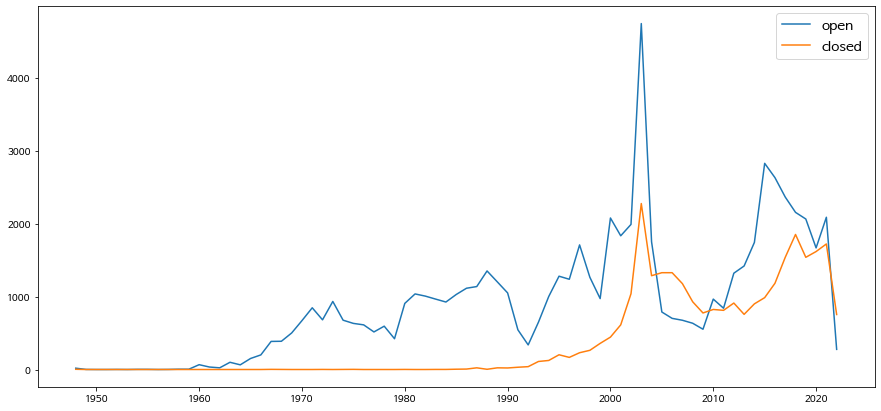

In [74]:
plt.figure(figsize=(15,7))
plt.plot(year, start['start_year'], label="open")
plt.plot(year, end['end_year'], label='closed')
plt.legend(loc='upper right', fontsize=14)

2003년도에 숙박업 업체의 수가 늘어난 이유는 실제 업체 수의 증가가 아닌 1999년도 부터 통보제로 영업신고를 한 방식이 2003년부터 신고제로 영업 신고 방식이 변경되었기 때문에 변화 폭이 크게 상승한 것이다.

[출처] http://www.sukbakmagazine.com/news/articleView.html?idxno=52799

### 6. 변수 간의 상관관계 확인하기

변수 간에 관계가 있는지 알아보자

In [75]:
lodge_df.corr()

,인허가일자,폐업일자,면적,운영기간,start_year,end_year
인허가일자,1.000000,0.493592,0.053949,-0.876587,0.999997,0.493592
폐업일자,0.493592,1.000000,0.079687,-0.014153,0.493536,0.999994
면적,0.053949,0.079687,1.000000,-0.017867,0.053939,0.079792
운영기간,-0.876587,-0.014153,-0.017867,1.000000,-0.876621,-0.014149
start_year,0.999997,0.493536,0.053939,-0.876621,1.000000,0.493536
end_year,0.493592,0.999994,0.079792,-0.014149,0.493536,1.000000


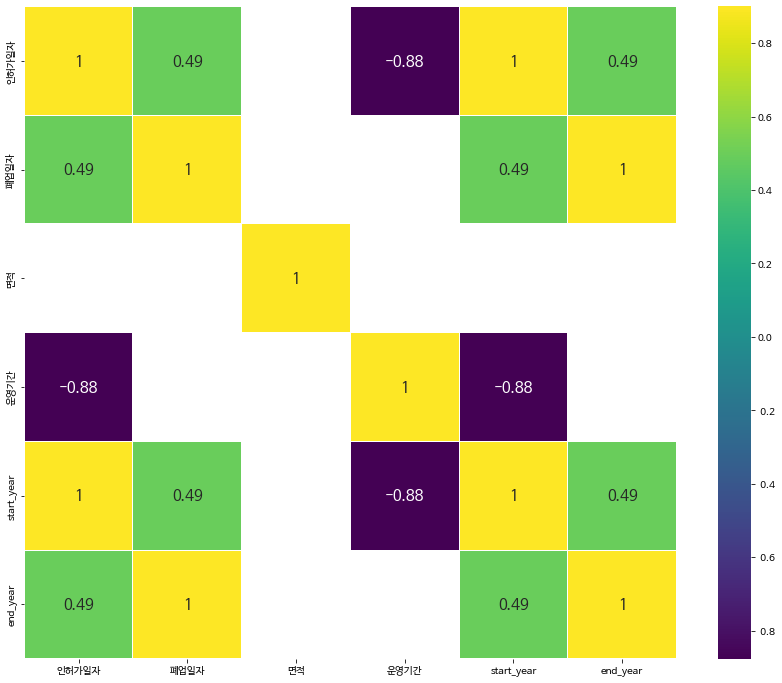

In [76]:
# 상관관계가 0.3 이상인 부분만 표현
corr = lodge_df.corr()
plt.subplots(figsize = (15, 12))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap = 'viridis', vmax = 0.9, linewidth = 0.1, annot = True, annot_kws = {'size': 15}, square = True)


위 heatmap을 통해 2가지의 정보를 알 수 있다.
1. 허가일자와 운영기간의 상관관계가 보이며 (허가일자가 최근년도에 가까울 수록 운영기간이 짧음)
2. 폐업일자와 인허가일자 간에 애매한 상관관계가 나타난다.

In [77]:
# save to DashBoard
lodge_df.to_csv("lodge_dashboard.csv", encoding='utf-8', index=None)

### EDA

위 과정에서 진행한 것 말고 추가로 전처리 작업 진행

#### 변수 선택 및 변환

1. 불필요한 칼럼 제외 (번호, 사업장명, start_year, end_year)
2. 날짜형으로 데이터 변환
3. Label Encoding

In [78]:
# 과정 2 진행 중 발생한 date 범위 오류값 수정
# 인허가일자
lodge_df['인허가일자'][lodge_df['인허가일자'] == 19970230] = 19970228
lodge_df['인허가일자'][lodge_df['인허가일자'] == 19750229] = 19750228
lodge_df['인허가일자'][lodge_df['인허가일자'] == 19940431] = 19940430
lodge_df['인허가일자'][lodge_df['인허가일자'] == 19840431] = 19840430

# 폐업일자
lodge_df['폐업일자'][lodge_df['폐업일자'] == 20020230] = 20020228
lodge_df['폐업일자'][lodge_df['폐업일자'] == 20020231] = 20020228
lodge_df['폐업일자'][lodge_df['폐업일자'] == 20140000] = 20140101
lodge_df['폐업일자'][lodge_df['폐업일자'] == 20000300] = 20000301
lodge_df['폐업일자'][lodge_df['폐업일자'] == 20020400] = 20020401
lodge_df['폐업일자'][lodge_df['폐업일자'] == 19990900] = 19990901
lodge_df['폐업일자'][lodge_df['폐업일자'] == 20000900] = 20000901
lodge_df['폐업일자'][lodge_df['폐업일자'] == 19970230] = 19970228

In [79]:
data = lodge_df

# 불필요한 칼럼 제외
data = data.drop(['번호','사업장명','start_year', 'end_year'], axis=1)

In [80]:
#-------- 날짜형으로 데이터 변환 ------------
# 약간 지저분한 방식으로 날짜형 데이터로 전환
# 1. int-> str 변환
# 2. str.slice 함수 사용하여 년도,월,일로 나눔
# 3. 나눠진 칼럼을 to_datetime으로 날짜형데이터로 변환
# 1~3 과정에서 발생한 임시 칼럼 삭제
def make_datetime(df,col):
    df[col] = df[col].astype('str')
    temp = df
    temp = pd.DataFrame(temp)
    temp['y'] = temp[col].str.slice(start=0, stop=4)
    temp['m'] = temp[col].str.slice(start=4, stop=6)
    temp['d'] = temp[col].str.slice(start=6, stop=8)
    
    temp[col] = temp['y']+"-"+temp['m']+"-"+temp['d']
    temp[col] = pd.to_datetime(temp[col])
    
    df['date'] = temp[col]

In [81]:
make_datetime(data,'인허가일자')
make_datetime(data,'폐업일자')

data = data.drop(['y','m','d','date'], axis=1)

In [82]:
# 본격적인 머신러닝을 하기 위해 0으로 지정한 값(null)을 중간값으로 값을 대체

data['운영기간'][data['운영기간'] ==0] = 17
data['면적'][data['면적'] == 0 ] = 335

In [83]:
data = data.sort_values(by="개방서비스명")

data.head(20)

,개방서비스명,지역,상세영업상태명,인허가일자,폐업일자,갱신일자,면적,운영기간
63825,0,알수없음,폐업,1948-08-15,2022-03-11,2022-03,335.0,74.0
59383,0,알수없음,폐업,1948-08-15,2022-03-11,2022-03,335.0,74.0
59388,0,알수없음,폐업,1948-08-15,2022-03-11,2022-03,335.0,74.0
59385,0,알수없음,폐업,1948-08-15,2022-03-11,2022-03,335.0,74.0
58570,0,알수없음,폐업,1948-08-15,2022-03-11,2022-03,335.0,74.0
65300,General Campground,알수없음,영업,1948-08-15,1948-08-15,2022-03,335.0,17.0
2076,Resort Condominium,알수없음,영업,1948-08-15,1948-08-15,2022-03,335.0,17.0
2313,Resort Condominium,알수없음,영업,1999-12-31,2022-03-11,2022-03,335.0,23.0
126,TOURIST HOTEL,알수없음,영업,1999-12-31,2022-03-11,2022-03,335.0,23.0
2861,Tourist Accommodation Business,알수없음,영업,1999-12-31,2022-03-11,2022-03,335.0,23.0


알수없는 데이터는 ML에 좋지 못한 영향을 줄 수 있으므로 제외

In [84]:
data = data[12:]

data.to_csv("lodge_dataset.csv", encoding='cp949', index=None)

### PySpark MLlib 활용하여 LinearRegression 하기

In [85]:
# SparkSession 객체 생성
spark = SparkSession\
        .builder\
        .appName('PySpark ML for Loging Industry')\
        .config('spark.some.config.option', 'some-value')\
        .getOrCreate()

In [86]:
df = spark.read.csv("lodge_dataset.csv", encoding='cp949',inferSchema = True, header = True)

df.show()

+------------+------+--------------+----------+----------+--------+------+--------+
|개방서비스명|  지역|상세영업상태명|인허가일자|  폐업일자|갱신일자|  면적|운영기간|
+------------+------+--------------+----------+----------+--------+------+--------+
|  관광숙박업|영월군|          영업|2011-05-13|2022-03-11| 2020-03| 335.0|    11.0|
|  관광숙박업|통영시|          영업|2014-04-03|2022-03-11| 2021-11|1097.0|     8.0|
|  관광숙박업|통영시|          영업|2014-04-28|2022-03-11| 2018-08| 496.0|     8.0|
|  관광숙박업|통영시|          영업|2014-06-23|2022-03-11| 2018-10| 427.0|     8.0|
|  관광숙박업|통영시|          영업|2018-06-11|2022-03-11| 2018-08| 335.0|     4.0|
|  관광숙박업|강릉시|          영업|1982-08-20|2022-03-11| 2018-08| 335.0|    40.0|
|  관광숙박업|철원군|          영업|2012-09-06|2022-03-11| 2020-02| 335.0|    10.0|
|  관광숙박업|정선군|          영업|2000-09-27|2022-03-11| 2021-05| 335.0|    22.0|
|  관광숙박업|정선군|          영업|2003-03-14|2022-03-11| 2021-05| 335.0|    19.0|
|  관광숙박업|정선군|          영업|2006-12-08|2022-03-11| 2021-05| 335.0|    16.0|
|  관광숙박업|고성군|          영업|1992-08-12|2022-

In [87]:
df.orderBy("인허가일자").show()

+------------+----------+--------------+----------+----------+--------+------+--------+
|개방서비스명|      지역|상세영업상태명|인허가일자|  폐업일자|갱신일자|  면적|운영기간|
+------------+----------+--------------+----------+----------+--------+------+--------+
|      숙박업|서울특별시|          폐업|1948-08-15|1975-09-18| 2018-08| 335.0|    27.0|
|      숙박업|서울특별시|          폐업|1948-08-15|1948-08-15| 2018-08| 335.0|    17.0|
|      숙박업|서울특별시|          폐업|1948-08-15|2001-07-07| 2018-08| 335.0|    53.0|
|      숙박업|서울특별시|          폐업|1948-08-15|2001-05-17| 2018-08| 335.0|    53.0|
|      숙박업|서울특별시|          폐업|1948-08-15|2000-06-15| 2018-08| 335.0|    52.0|
|      숙박업|서울특별시|          영업|1948-08-15|2022-03-11| 2019-12|144.93|    74.0|
|      숙박업|서울특별시|          폐업|1948-08-15|2015-12-03| 2018-08| 148.5|    67.0|
|      숙박업|서울특별시|          폐업|1948-08-15|1967-07-10| 2018-08| 335.0|    19.0|
|      숙박업|서울특별시|          영업|1948-08-15|2022-03-11| 2018-10| 907.0|    74.0|
|      숙박업|서울특별시|          폐업|1948-08-15|1972-07-31| 2018-08| 335.0|

### 범주형 변수 처리하기

아래는 총 3가지 과정으로 진행

1. StringIndexer

범주형 변수를 인덱싱하여 0.0 , 1.0, 2.0 과 같은 번호로 인덱싱

2. OneHotEncoder

인덱싱한 값은 0,1,2 와 같이 값으로써 크기를 가지기 때문에 OneHotEncoder를 사용하여 값의 크기를 갖지 않도록 변환

3. VectorAssembler

인코딩한 값을 벡터로 모으기

In [88]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# 갱신일자, 인허가일자, 폐업일자를 제외하고 다시 진행
category_cols = ['개방서비스명','지역','인허가일자','폐업일자','갱신일자']
numeric_cols = ['면적','운영기간']
# label
label_idx = StringIndexer(inputCol = "상세영업상태명", outputCol= "label")

# 범주형 변수들을 인덱싱
indexers = [
    StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
    for c in category_cols
]

# 인덱싱한 변수들을 인코딩
encoders = [OneHotEncoder(dropLast=False,inputCol=indexer.getOutputCol(),
            outputCol="{0}_encoded".format(indexer.getOutputCol())) 
    for indexer in indexers
]

# 인코딩 된 값과 숫자 변수 값을 벡터화
# -- encoder와 numeric cols 의 결합 리스트 관련 지식 부족(Array로 안됨)

assembler = VectorAssembler(inputCols=['개방서비스명_indexed_encoded', '지역_indexed_encoded', '인허가일자_indexed_encoded', '폐업일자_indexed_encoded', '갱신일자_indexed_encoded','면적','운영기간'],outputCol="features")

pipeline = Pipeline(stages=[label_idx] + indexers  + encoders+[assembler])
model=pipeline.fit(df)
transformed = model.transform(df)
transformed.show(5)

+------------+------+--------------+----------+----------+--------+------+--------+-----+--------------------+------------+------------------+----------------+----------------+----------------------------+--------------------+--------------------------+------------------------+------------------------+--------------------+
|개방서비스명|  지역|상세영업상태명|인허가일자|  폐업일자|갱신일자|  면적|운영기간|label|개방서비스명_indexed|지역_indexed|인허가일자_indexed|폐업일자_indexed|갱신일자_indexed|개방서비스명_indexed_encoded|지역_indexed_encoded|인허가일자_indexed_encoded|폐업일자_indexed_encoded|갱신일자_indexed_encoded|            features|
+------------+------+--------------+----------+----------+--------+------+--------+-----+--------------------+------------+------------------+----------------+----------------+----------------------------+--------------------+--------------------------+------------------------+------------------------+--------------------+
|  관광숙박업|영월군|          영업|2011-05-13|2022-03-11| 2020-03| 335.0|    11.0|  0.0|                 2.0| 

In [89]:
trans_df = transformed.select(['label','features'])

In [90]:
from pyspark.ml.regression import LinearRegression

lr = (LinearRegression(featuresCol='features', labelCol="label", predictionCol='predlabel', 
                               maxIter=10, regParam=0.3, elasticNetParam=0.8, standardization=False))

In [91]:
trans_df.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(21785,[2,78,5204...|
|  0.0|(21785,[2,37,3962...|
|  0.0|(21785,[2,37,1018...|
|  0.0|(21785,[2,37,1310...|
|  0.0|(21785,[2,37,423,...|
|  0.0|(21785,[2,22,2522...|
|  0.0|(21785,[2,94,5261...|
|  0.0|(21785,[2,58,2061...|
|  0.0|(21785,[2,58,1624...|
|  0.0|(21785,[2,58,6834...|
|  0.0|(21785,[2,33,1109...|
|  0.0|(21785,[2,37,2347...|
|  0.0|(21785,[2,33,1987...|
|  0.0|(21785,[2,33,1447...|
|  0.0|(21785,[2,33,6289...|
|  0.0|(21785,[2,33,5111...|
|  0.0|(21785,[2,33,1177...|
|  0.0|(21785,[2,33,4634...|
|  0.0|(21785,[2,33,8424...|
|  2.0|(21785,[2,47,236,...|
+-----+--------------------+
only showing top 20 rows



In [92]:
train_data, test_data = trans_df.randomSplit([.7,.3], seed=1234)

In [93]:
train_data.columns

['label', 'features']

In [94]:
# Fit the data to the model
linearModel = lr.fit(train_data)

In [95]:
predictions = linearModel.transform(test_data)

predandlabels = predictions.select("predlabel", "label")

In [96]:
predandlabels.show()

+-------------------+-----+
|          predlabel|label|
+-------------------+-----+
| 0.5338359690389409|  0.0|
| 0.5328320828321159|  0.0|
| 0.5296219815893614|  0.0|
| 0.5068594455043749|  0.0|
| 0.5040579026016073|  0.0|
| 0.5036493442616203|  0.0|
| 0.5030656894902105|  0.0|
| 0.4937272131476519|  0.0|
| 0.4875988380478478|  0.0|
|0.48613970111932303|  0.0|
|0.48351325464797845|  0.0|
| 0.4771076435317547|  0.0|
| 0.3851674256654085|  0.0|
| 0.3222611144028484|  0.0|
| 0.5182407135468682|  0.0|
| 0.5232017791038523|  0.0|
| 0.5069645033632286|  0.0|
| 0.4983964513189312|  0.0|
|  0.469590170075995|  0.0|
|  0.373829931730771|  0.0|
+-------------------+-----+
only showing top 20 rows



### 평가

RMSE, MAE, R2 3가지 항목으로 모델 평가

In [97]:
from pyspark.ml.evaluation import RegressionEvaluator

# Get the RMSE
print("RMSE: {0}".format(linearModel.summary.rootMeanSquaredError))

print("MAE: {0}".format(linearModel.summary.meanAbsoluteError))

# Get the R2
print("R2: {0}".format(linearModel.summary.r2))

RMSE: 0.4967260710859409
MAE: 0.47736113501655386
R2: 0.031984158610385505


In [98]:
evaluator = RegressionEvaluator(predictionCol="predlabel", labelCol='label', metricName='rmse')
print("RMSE: {0}".format(evaluator.evaluate(predandlabels)))

evaluator = RegressionEvaluator(predictionCol="predlabel", labelCol='label', metricName='mae')
print("MAE: {0}".format(evaluator.evaluate(predandlabels)))

evaluator = RegressionEvaluator(predictionCol="predlabel", labelCol='label', metricName='r2')
print("R2: {0}".format(evaluator.evaluate(predandlabels)))

RMSE: 0.49655027050849465
MAE: 0.4767055776950074
R2: 0.0344204672344145


In [99]:
spark.stop()

### Reference

https://www.analyticsvidhya.com/blog/2020/11/a-must-read-guide-on-how-to-work-with-pyspark-on-google-colab-for-data-scientists/

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html

https://minsw.github.io/2021/02/02/Spark-The-Definitive-Guide-6%EC%9E%A5/

https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.ml.feature.OneHotEncoder.html

https://medium.com/@nutanbhogendrasharma/role-of-onehotencoder-and-pipelines-in-pyspark-ml-feature-part-2-3275767e74f0

https://spark.apache.org/docs/latest/ml-classification-regression.html